# Inheritance hierarchy of builtins that are types

In [1]:
import builtins
import graphviz

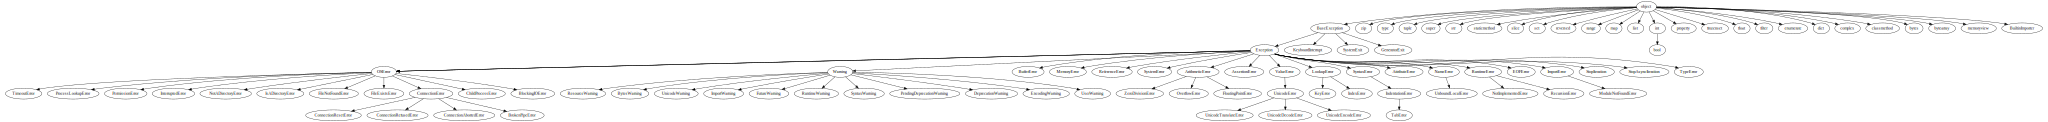

In [2]:
types = [member for member in vars(builtins).values()
         if isinstance(member, type) and not member.__name__.startswith('_')]
visited = set(types)
graph = graphviz.Digraph()

while types:
    child = types.pop()
    for parent in child.__bases__:
        graph.edge(parent.__name__, child.__name__)
        if parent not in visited:
            visited.add(parent)
            types.append(parent)

graph